<a href="https://colab.research.google.com/github/Khushboo-Dar/ml-basics/blob/main/handwr_dig_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8630 - loss: 0.4741
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9659 - loss: 0.1103
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9759 - loss: 0.0757
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9641 - loss: 0.1132
0.9695000052452087
0.09906560182571411
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The number is probably a 9


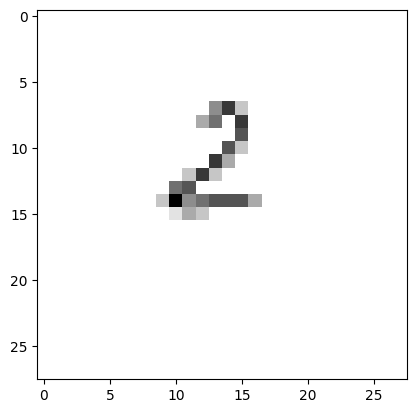

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The number is probably a 5


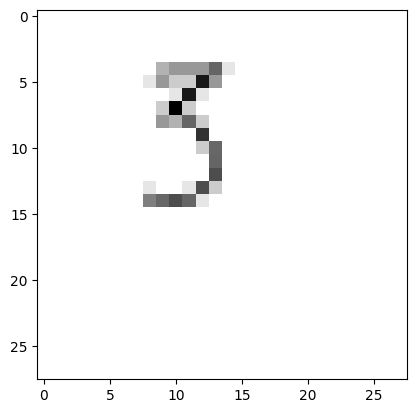

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The number is probably a 1


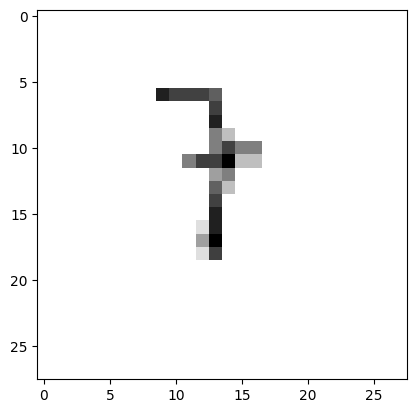

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The number is probably a 1


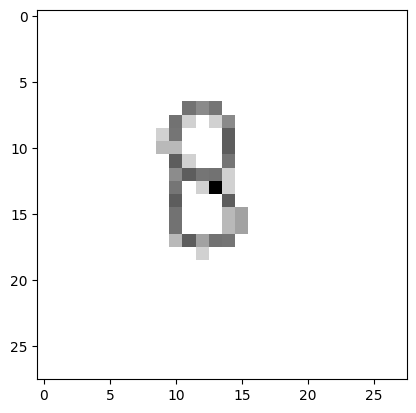

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The number is probably a 8


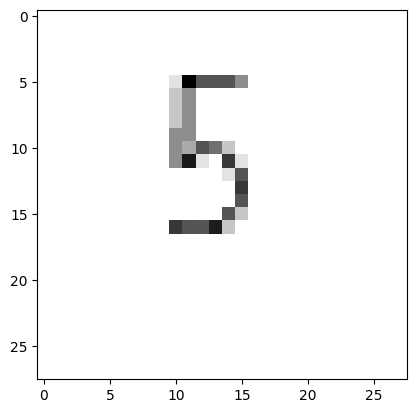

In [8]:
# Import required libraries
from IPython import get_ipython
from IPython.display import display
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
import os

# Mount Google Drive to access the files (if they're there)
drive.mount('/content/drive')

# Check if files are in google drive, if not create them
drive_path='/content/drive/MyDrive/'
if not os.path.exists(drive_path+'1.png'):
  print('Files not found in Google Drive, creating dummy files')
  # Create dummy image files for testing if they don't exist
  for x in range(1, 6):
      dummy_img = np.zeros((28, 28), dtype=np.uint8)  # Create a blank 28x28 image
      cv.imwrite(f'{x}.png', dummy_img)  # Save it as a PNG file
      cv.imwrite(drive_path+f'{x}.png', dummy_img) # Save it to the drive

# Create the local directory if it does not exist.
if not os.path.exists('/content/'):
  os.makedirs('/content/')
# copy the files from the google drive to the local directory so that the code can run
!cp /content/drive/MyDrive/*.png /content/

# The below code block has been commented out because it was successfully executed in the prior run

# datasets containing handwritten digits
mnist = tf.keras.datasets.mnist
# Corrected unpacking: first get the two tuples, then unpack them
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# we wont scale y data as these are the labels
# creating a basic neural nw
model = tf.keras.models.Sequential()
# flatten layer is 1D layer; more of a grid
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# next layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
# output layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

# compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # changed loss function name
    metrics=["accuracy"],
)

# train the model
model.fit(x_train, y_train, epochs=3)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)
# Change the file name to digits.keras or digits.h5
model.save("digits.keras")  # Added .keras extension

# Modified loop to check if images were read successfully
for x in range(1, 6):
    img = cv.imread(f'{x}.png')
    if img is not None:
        # Proceed only if the image was loaded
        img = img[:, :, 0]  # Get the first channel
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The number is probably a {np.argmax(prediction)}")

        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    else:
        print(f"Error: Could not load image {x}.png")

argmax is giving us the index of the highest value

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow